In [4]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error as mea

import matplotlib.pyplot as plt
%matplotlib inline

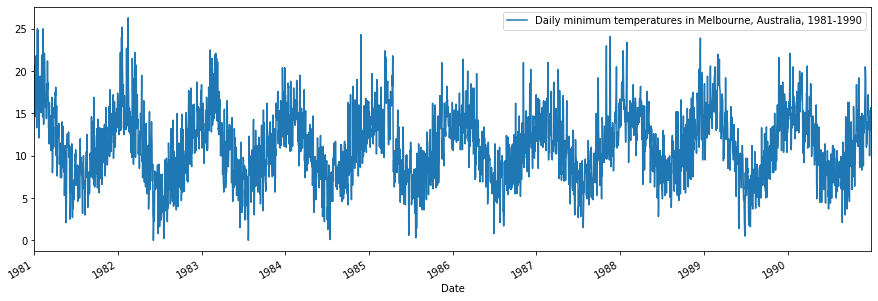

In [5]:
path = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/daily-temp.csv'
df = pd.read_csv(path, parse_dates=['Date'], index_col='Date')

df.plot(figsize=(15,5));

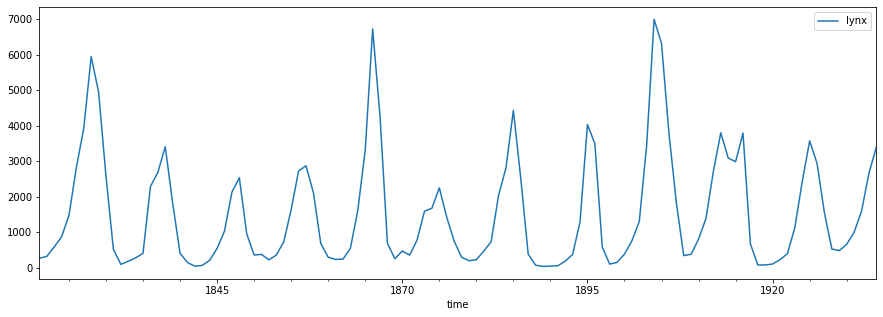

In [6]:
path = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/lynx.csv'
df = pd.read_csv(path, parse_dates=['time'], index_col='time')

df.plot(figsize=(15,5));

In [7]:
path = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/mauna_loa.csv'
df = pd.read_csv(path)

df.head()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800
0,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57
3,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07


Łączenie daty na okrętkę

In [21]:
df['date']=df.apply( lambda row: '{}-{}-{}'.format(int(row['year']), int(row['month']), int(row['day'])), axis=1)

df['date'] = pd.to_datetime(df['date'])

df[ ['date'] ].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 1 columns):
date    2321 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 18.2 KB


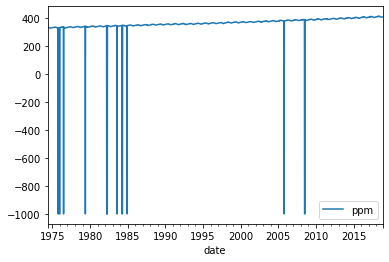

In [23]:
df.index = df['date'] 

df [['ppm']].plot();

Łączenie daty prościej

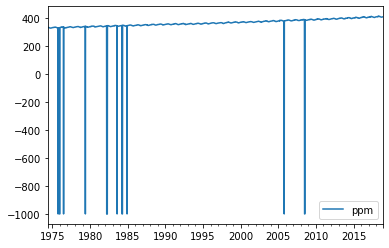

In [26]:
df.index = pd.to_datetime(df[['year', 'month', 'day']])

df [['ppm']].plot();

Outlajery
Ponieważ mamy dziwne wartości (-999) zapewne w czasie gdy nie było danych z czujnika to trzeba je usunąć

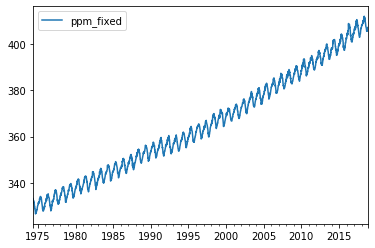

In [29]:
df['ppm_fixed'] = df['ppm'].map(lambda x: np.nan if x<0 else x).fillna(method='backfill')

df [['ppm_fixed']].plot();

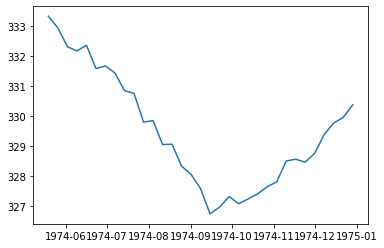

In [32]:
df1974 = df[df.year == 1974]
plt.plot(df1974.index, df1974.ppm_fixed);

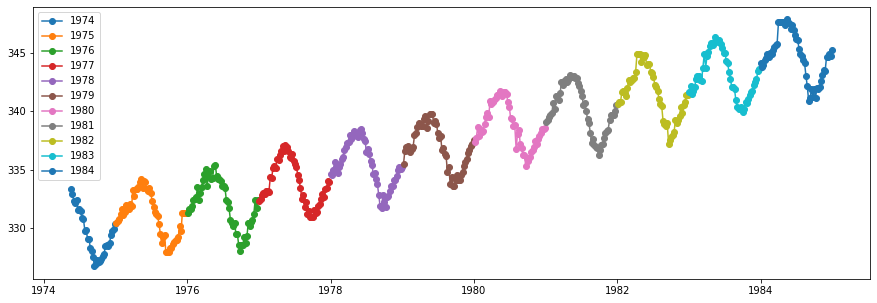

In [41]:
plt.figure(figsize=(15,5))
for year in range (1974, 1985):
    df_year = df[df.year == year]
    plt.plot(df_year.index, df_year['ppm_fixed'], 'o-', label=year);
    
plt.legend();